In [1]:
import pandas as pd
import os
from matplotlib import pyplot as plt
from matplotlib import cm
import seaborn as sns

In [2]:
Grades = ['G4', 'G8']
StuGrp = ['All', 'RaceEth']
gr = 'G8'
sg = 'All'

# Save Figures 
FigLoc = '../figures/'

# Clean Data Location
ClnDat = '../data_raw/ContextualData/'
# Load data
ReadDF = pd.read_csv(ClnDat+'NDECoreExcel_Reading_'+gr+'_'+sg+'.csv')

if sg == 'RaceEth':
    ReadDF.columns = ['Year', 'juris', 'stugrp', 'Below Basic', 'Basic', 'Proficient', 'Advanced']
if sg == 'All':
    ReadDF.columns = ['Year', 'juris', 'stugrp', 'Below Basic', 'Basic', 'Proficient', 'Advanced']


ReadDF = ReadDF.drop(columns = ['juris'])
ReadDF['Below Basic'] = (-1)*ReadDF['Below Basic']
ReadDF['Basic'] = (-1)*ReadDF['Basic']

<Figure size 432x288 with 0 Axes>

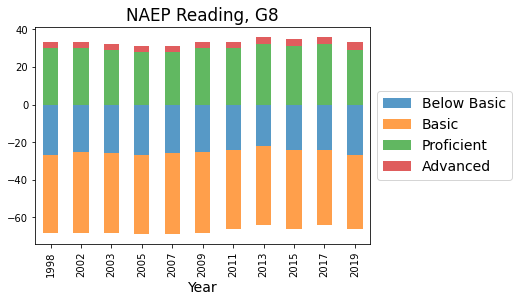

In [3]:
plt.figure()
plt.rcParams.update({'font.size': 14})

ReadDF.sort_values('Year') \
    .plot.bar(x = 'Year', stacked = True, title = 'NAEP Reading, '+ gr, alpha = 0.75, fontsize = 10) \
    .legend(loc='center left' ,bbox_to_anchor=(1.0, 0.5))

plt.savefig(FigLoc + 'ReadLev' + gr + '.png', dpi = 300, transparent = True, bbox_inches = 'tight')

In [4]:
Grades = ['G4', 'G8']
StuGrp = ['All', 'RaceEth']
gr = 'G8'
sg = 'All'

ReadDF = pd.DataFrame()
for gr in Grades:
    ClnDat = '../data_raw/ContextualData/'
    ReadDF0 = pd.read_csv(ClnDat+'NDECoreExcel_Reading_'+gr+'_'+sg+'.csv')
    if sg == 'RaceEth':
        ReadDF0.columns = ['Year', 'juris', 'stugrp', 'Below Basic', 'Basic', 'Proficient', 'Advanced']
    if sg == 'All':
        ReadDF0.columns = ['Year', 'juris', 'stugrp', 'Below Basic', 'Basic', 'Proficient', 'Advanced']
    ReadDF0['Grade'] = gr[1:]
    ReadDF = ReadDF.append(ReadDF0)


ReadDF = ReadDF.drop(columns = ['juris'])

ReadDF['Not Proficient'] = ReadDF['Below Basic'] + ReadDF['Basic']
ReadDF['On Level'] = ReadDF['Proficient'] + ReadDF['Advanced']
ReadDF['Year'] = ReadDF['Year'].astype(int)
# ReadDF['Below Basic'] = (-1)*ReadDF['Below Basic']
# ReadDF['Basic'] = (-1)*ReadDF['Basic']
ReadDF.head()

,Year,stugrp,Below Basic,Basic,Proficient,Advanced,Grade,Not Proficient,On Level
0,2019,All students,34,31,26,9,4,65,35
1,2017,All students,32,31,27,9,4,63,36
2,2015,All students,31,33,27,9,4,64,36
3,2013,All students,32,33,27,8,4,65,35
4,2011,All students,33,34,26,8,4,67,34


<Figure size 432x288 with 0 Axes>

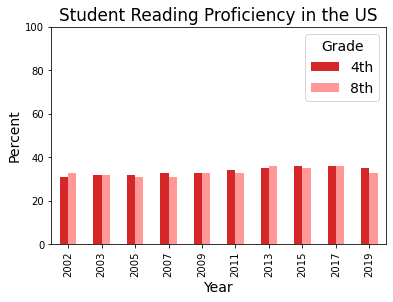

In [5]:
colors = cm.get_cmap('tab20', 20)
clrs = [colors(6), colors(7)]
plt.figure()
plt.rcParams.update({'font.size': 14})

ReadDF[['Year', 'Grade', 'On Level']][ReadDF['Year'] > 2000].reset_index(drop = True) \
    .pivot(index = ['Year'], columns = ['Grade']) \
    .plot(kind = 'bar', title = 'Student Reading Proficiency in the US', 
          color = clrs, ylim = (0, 100), fontsize = 10) \
    .legend(['4th', '8th'], loc = 'upper right', title = 'Grade')
plt.ylabel('Percent')

plt.savefig(FigLoc + 'ReadProf.png', dpi = 300, transparent = True)